<a href="https://colab.research.google.com/github/hgstyler/SEM-Denoise-Project/blob/main/SEM_relisting_augmentation_20221024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **SEM Images ReListing** ###

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/drive/MyDrive/SEM')
os.getcwd()

'/content/drive/MyDrive/SEM'

In [ ]:
def get_subdir(path):
    items = os.listdir(path)
    
    subdirs = []
    for item in items:
        if item[0] == '.' or item.find('20220720') != -1:
            continue
        path_item = os.path.join(path, item)
        if os.path.isdir(path_item):
            subdirs.append(path_item)

    subdirs.sort()
    
    return subdirs

def is_dir_empty(path):
  if len(os.listdir(path)) == 0:
    return True
  else:
    return False

def get_tif_files(path):
    items = os.listdir(path)
    
    subfiles = []
    for item in items:
        if item[0] == '.':
            continue
        if item.endswith('.tif'):
            subfiles.append(item)
    
    subfiles.sort()

    return subfiles

def save_to_data_dir(img_path, p, f):
  img = cv2.imread(img_path)
  if os.path.exists(p) == False:
    os.mkdir(p)
  file_path = os.path.join(p, f)
  cv2.imwrite(file_path, img)
  print(file_path)

  return

def get_path_files(path, fns):
    p_fns = []
    
    for item in fns:
        p_fns.append(os.path.join(path, item))
    
    return p_fns

def get_imgs(files):
    return [cv2.imread(f) for f in files]

In [ ]:
os.chdir('/content/drive/MyDrive/SEM/')
os.getcwd()

path_here = os.getcwd()

subdirs_here = get_subdir(path_here)

print(f'Current Dir: {path_here}')
print(f'Sub Dirs: {subdirs_here}')

Current Dir: /content/drive/MyDrive/SEM
Sub Dirs: ['/content/drive/MyDrive/SEM/20220823', '/content/drive/MyDrive/SEM/20220826', '/content/drive/MyDrive/SEM/20220831', '/content/drive/MyDrive/SEM/20220902']


In [ ]:
dir_data = '/content/drive/MyDrive/ML/Data/20221013/'

if os.path.exists('/content/drive/MyDrive/ML/Data/20221013/xdata') == False:
  os.mkdir('/content/drive/MyDrive/ML/Data/20221013/xdata')

if os.path.exists('/content/drive/MyDrive/ML/Data/20221013/ydata') == False:
  os.mkdir('/content/drive/MyDrive/ML/Data/20221013/ydata')

if is_dir_empty('/content/drive/MyDrive/ML/Data/20221013/xdata') == True:
  print('/content/drive/MyDrive/ML/Data/20221013/xdata is empty')
else:
  print('/content/drive/MyDrive/ML/Data/20221013/xdata is NOT empty')

if is_dir_empty('/content/drive/MyDrive/ML/Data/20221013/ydata') == True:
  print('/content/drive/MyDrive/ML/Data/20221013/ydata is empty')
else:
  print('/content/drive/MyDrive/ML/Data/20221013/ydata is NOT empty')

/content/drive/MyDrive/ML/Data/20221013/xdata is NOT empty
/content/drive/MyDrive/ML/Data/20221013/ydata is NOT empty


In [ ]:
dir_numbering = 1
save_file_numbering_ydata = 1

for dir_iter in subdirs_here:
  os.chdir(dir_iter)
  print(f'------------------------------ working on {dir_iter} ------------------------------')

  path_here = os.getcwd()
  norm_path_here = os.path.join(path_here, 'norm')

  if os.path.exists(norm_path_here) == False:
    continue

  else:
    os.chdir(norm_path_here)
    files_here = get_tif_files(norm_path_here)

    numbering_tif_files = []
    file_numbering = 1
    save_file_numbering = 1

    for file in files_here:
      file_numbering_str = str(file_numbering).zfill(4)
      tmp = os.path.join(os.getcwd(), file)
      
      if file.find(file_numbering_str) == -1:
        file_numbering += 1
        save_file_numbering = 1
        dir_numbering += 1
        
      if file.find('Spot_03_Dwell_30us') == -1:
        save_dir = 'xdata'
      else:
        save_dir = 'ydata'
        
      if save_dir == 'xdata':
        save_path = os.path.join(dir_data, save_dir, str(dir_numbering))
        save_file = str(save_file_numbering) + '.tif'
        print(f'{tmp}\t{file_numbering}\t{dir_numbering}\t{save_file_numbering}\t{save_dir}\t-> ', end='')
        save_to_data_dir(tmp, save_path, save_file)
        save_file_numbering += 1
      else:
        save_path = os.path.join(dir_data, save_dir, str(dir_numbering))
        save_file = str(save_file_numbering_ydata) + '.tif'
        print(f'{tmp}\t{file_numbering}\t{dir_numbering}\t{save_file_numbering_ydata}\t[{save_dir}]\t-> ', end='')
        save_to_data_dir(tmp, save_path, save_file)

    dir_numbering += 1  
    print()

os.chdir('/content/drive/MyDrive/SEM')

------------------------------ working on /content/drive/MyDrive/SEM/20220823 ------------------------------
/content/drive/MyDrive/SEM/20220823/norm/TinBall0001_30kV_x30k_Spot_015_Dwell_100ns.tif	1	1	1	xdata	-> /content/drive/MyDrive/ML/Data/20221013/xdata/1/1.tif
/content/drive/MyDrive/SEM/20220823/norm/TinBall0001_30kV_x30k_Spot_015_Dwell_10us.tif	1	1	2	xdata	-> /content/drive/MyDrive/ML/Data/20221013/xdata/1/2.tif
/content/drive/MyDrive/SEM/20220823/norm/TinBall0001_30kV_x30k_Spot_015_Dwell_1us.tif	1	1	3	xdata	-> /content/drive/MyDrive/ML/Data/20221013/xdata/1/3.tif
/content/drive/MyDrive/SEM/20220823/norm/TinBall0001_30kV_x30k_Spot_015_Dwell_30us.tif	1	1	4	xdata	-> /content/drive/MyDrive/ML/Data/20221013/xdata/1/4.tif
/content/drive/MyDrive/SEM/20220823/norm/TinBall0001_30kV_x30k_Spot_015_Dwell_3us.tif	1	1	5	xdata	-> /content/drive/MyDrive/ML/Data/20221013/xdata/1/5.tif
/content/drive/MyDrive/SEM/20220823/norm/TinBall0001_30kV_x30k_Spot_015_Dwell_500ns.tif	1	1	6	xdata	-> /content/

In [ ]:
os.chdir('/content/drive/MyDrive/SEM')
os.getcwd()

'/content/drive/MyDrive/SEM'

### **Augmentation v1**###

In [ ]:
from PIL import Image
import numpy as np
import time
import torch
import torchvision
import torchvision.utils as vutils
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import albumentations
import albumentations.pytorch
from matplotlib import pyplot as plt
import random
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
dataroot = '/content/drive/MyDrive/ML/Data/20221013/'
batch_size = 128
workers = 2
image_size = 256

In [ ]:
# Randomness Control
random_seed = 42
# random_seed = random.randint(1, 10000)

# torch
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.cuda.manual_seed_all(random_seed) # if use multi-GPU

# CuDNN
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# numpy
np.random.seed(random_seed)

# random module (for torchvision transforms)
random.seed(random_seed)

In [ ]:
transform_train = transforms.Compose([transforms.RandomCrop(image_size),
                            transforms.RandomRotation(degrees=(0, 180)),
                            transforms.RandomHorizontalFlip(p = 0.4),
                            # transforms.Grayscale(),
                            transforms.ToTensor(),
                            ])

In [ ]:
trainset_x = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/ML/Data/20221013/xdata',
                                           transform = transform_train)
trainset_y = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/ML/Data/20221013/ydata',
                                           transform = transform_train)

In [ ]:
print(len(trainset_x))
print(len(trainset_y))

510
15


In [ ]:
type(trainset_x)

torchvision.datasets.folder.ImageFolder

In [ ]:
trainset_x[3]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]), 0)

In [ ]:
type(trainset_x[3])

tuple

TypeError: ignored

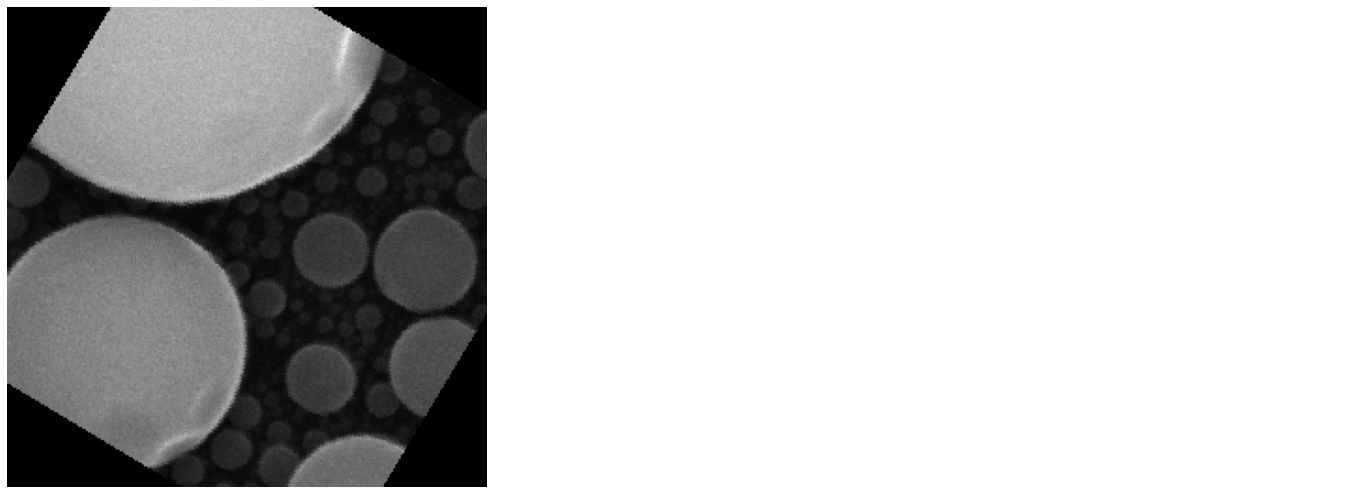

In [ ]:
plt.figure(figsize=(40,30))
tmp_idx = 1

for img in trainset_x[random.randint(0, 14)]:
  if tmp_idx > 9:
    break
  else:
    plt.subplot(3, 3, tmp_idx)
    plt.axis("off")
    plt.imshow(torch.permute(img, (1, 2, 0)), cmap='gray')
    tmp_idx += 1
    continue